# Pokémon Legendary Classifier using XGBoost

This repository contains a machine learning model built with XGBoost to predict whether a Pokémon is legendary or not. The model is trained on a dataset with various Pokémon characteristics, including 'Attack', 'Sp. Atk', 'Sp. Def', and 'Speed'. The target variable is binary, with 'Legendary' indicating whether a Pokémon is legendary (True) or not (False).


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

data_url = 'https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv'
df = pd.read_csv(data_url, index_col='Name' )

In [3]:
df.head()

,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Select features and target variable
X = df[['Attack','Sp. Atk' , 'Sp. Def', 'Speed']]
y = df['Legendary']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and configure the XGBoost model 
model = XGBClassifier(learning_rate = 0.01, max_depth = 7, n_estimators= 300)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")





Accuracy: 0.95625


In [5]:
# Feature importance
importance = model.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print(feature_importance)

   Feature  Importance
1  Sp. Atk    0.330565
0   Attack    0.261692
3    Speed    0.241509
2  Sp. Def    0.166234


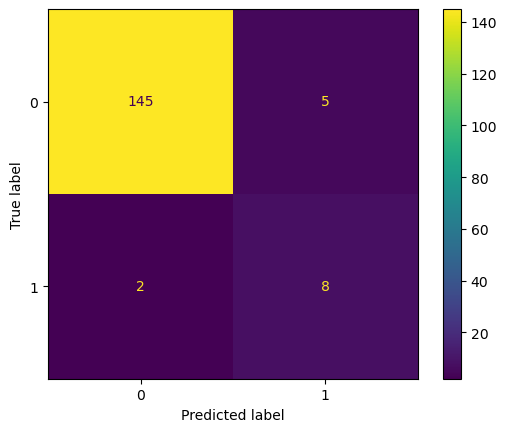

              precision    recall  f1-score   support

       False       0.99      0.97      0.98       150
        True       0.62      0.80      0.70        10

    accuracy                           0.96       160
   macro avg       0.80      0.88      0.84       160
weighted avg       0.96      0.96      0.96       160



In [6]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

cm=confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print(classification_report(y_val, y_pred))

In [7]:
# Optimize hyperparameters (example with grid search)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_best = best_model.predict(X_val)

# Evaluate the best model
accuracy_best = accuracy_score(y_val, y_pred_best)
print(f"Accuracy with best model: {accuracy_best}")

Best Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300}
Accuracy with best model: 0.95625


In [11]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation with the best model
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

# Print the average accuracy score
print("Average Accuracy:", cv_scores.mean())


Average Accuracy: 0.9375
